### **Bài 1:**

Tạo  tập dữ liệu 600 điểm:

- 200 điểm theo phân phối Gaussian $\mathcal{N}((2, 2), \Sigma)$

- 200 điểm theo phân phối Gaussian $\mathcal{N}((8, 3), \Sigma)$

- 200 điểm theo phân phối Gaussian $\mathcal{N}((3, 6), \Sigma)$

với $\Sigma = 
\left(\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right)$.

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from matplotlib.backends.backend_pdf import PdfPages
import random
np.random.seed(18)

In [2]:
sigma = np.array([[1, 0], [0, 1]])
N=200
d11 = np.random.multivariate_normal(mean=[2, 2], cov=sigma, size=N)
d12 = np.random.multivariate_normal(mean=[8, 3], cov=sigma, size=N)
d13 = np.random.multivariate_normal(mean=[3, 6], cov=sigma, size=N)

X1 = np.concatenate((d11, d12, d13), axis=0)
K = 3

original_labels = np.asarray([0]*N + [1]*N + [2]*N).T

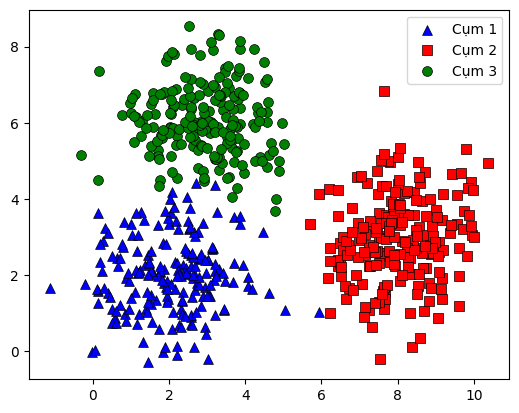

In [3]:
def kmeans_display(X, labels):
    X = np.array(X)
    labels = np.array(labels)

    markers = ['^', 's', 'o']
    colors = ['blue', 'red', 'green']

    for k in range(3):
        Xk = X[labels == k]
        plt.scatter(Xk[:, 0], Xk[:, 1],
                    c=colors[k], marker=markers[k],
                    edgecolors='black', linewidths=0.5,
                    s=50, label=f'Cụm {k+1}')

    plt.axis('scaled')
    plt.legend()
    plt.show()


kmeans_display(X1, original_labels)

Các hàm thành phần của k-means

In [4]:
def k_means_init_centroids(X, k):
    return X[np.random.choice(X.shape[0], k)]

def k_means_assign_labels(X, centroids):
    D = cdist(X, centroids)
    return np.argmin(D, axis=1)

def k_means_update_centroids(X, labels, K):
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
        Xk = X[labels == k, :]
        centroids[k, :] = np.mean(Xk, axis = 0)
    return centroids

def has_converged(centroids, new_centroids):
    return (set([tuple(a) for a in centroids]) == set([tuple(a) for a in new_centroids]))

Phần chính của k-means

In [5]:
def kmeans(X, K):
    centroids = [k_means_init_centroids(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(k_means_assign_labels(X, centroids[-1]))
        new_centroids = k_means_update_centroids(X, labels[-1], K)
        if has_converged(centroids[-1], new_centroids):
            break
        centroids.append(new_centroids)
        it += 1
    return (centroids, labels, it)    

Áp dụng thuật toán vừa viết vào dữ liệu ban đầu, hiển thị kết quả cuối cùng. 

Tâm cụm được tìm ra bởi thuật toán kmeans:
 [[2.00977268 1.97387946]
 [2.94030031 6.04919913]
 [7.98642782 2.93618727]]


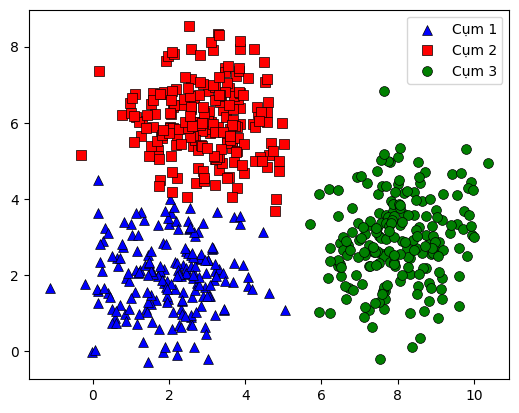

In [6]:
(centroids, labels, it) = kmeans(X1, K)
print('Tâm cụm được tìm ra bởi thuật toán kmeans:\n', centroids[-1])
kmeans_display(X1, labels[-1])

**Nhận xét:**
- Ta có thể thấy việc phân cụm dùng k-means trong bài toán này hoạt động khá tốt, khi đa số các điểm thuộc cùng cụm tập hợp theo vòng tròn quanh tâm cụm (như hình dùng original_labels).
- Tuy nhiên, một vài điểm ở vùng biên của cụm bị nhẫm lẫn làm giảm độ chính xác khi phân cụm.
- Tâm cụm mới được tìm ra bằng k-means xấp xỉ bằng tâm cụm chọn khi tạo dữ liệu (tất nhiên là không thể bằng chính xác).

**Ảnh hưởng của việc khởi tạo tâm cụm ngẫu nhiên đến hiệu quả tổng thể của k-means.**
- Làm quá trình hội tụ chậm.
- Gây nhiễu cho kết quả làm cụm phân sai hoặc không rõ ràng.
- Kết quả không ổn định.

### **Bài 2:**

Tạo tập dữ liệu gồm:

- 50 điểm theo phân phối Gaussian $\mathcal{N}((2, 2), \Sigma)$

- 20 điểm theo phân phối Gaussian $\mathcal{N}((8, 3), \Sigma)$

- 1000 điểm theo phân phối Gaussian $\mathcal{N}((3, 6), \Sigma)$

với $\Sigma = 
\left(\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right)$.

In [7]:
sigma = np.array([[1, 0], [0, 1]])
d21 = np.random.multivariate_normal(mean=[2, 2], cov=sigma, size=50)
d22 = np.random.multivariate_normal(mean=[8, 3], cov=sigma, size=20)
d23 = np.random.multivariate_normal(mean=[3, 6], cov=sigma, size=1000)

X2 = np.concatenate((d21, d22, d23), axis=0)
K = 3


In [8]:
from matplotlib.colors import ListedColormap

def kmeans_display_progress(X, centroids, labels, iteration, filename, saving=False):
    max_iterations = iteration + 1

    # Màu vùng cụm: dùng phiên bản nhạt của màu cụm
    region_colors = ['#ADD8E6', '#F08080', '#90EE90']  # xanh dương nhạt, đỏ nhạt, xanh lá nhạt
    cluster_colors = ['blue', 'red', 'green']
    markers = ['^', 's', 'o']
    cmap = ListedColormap(region_colors)

    # Tạo lưới để tô nền cụm
    h = 0.05
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = k_means_assign_labels(grid, centroids)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)

    # Vẽ các điểm dữ liệu và centroid
    for k in range(3):
        Xk = X[labels == k]
        plt.scatter(Xk[:, 0], Xk[:, 1],
                    c=cluster_colors[k], marker=markers[k],
                    edgecolors='black', linewidths=0.5,
                    s=50, label=f'Cụm {k+1}')

        # Vẽ centroid to màu vàng viền đen
        plt.scatter(centroids[k, 0], centroids[k, 1],
                    c='yellow', edgecolors='black', marker=markers[k],
                    s=300, linewidths=1.5)

    plt.title(f'Iteration: {iteration + 1}/{max_iterations}')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()

    if saving:
        plt.savefig(filename)
    else:
        plt.show()


10


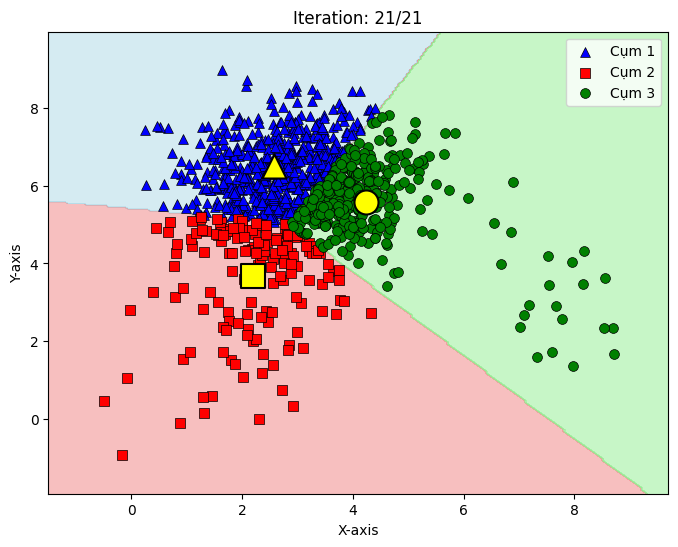

In [9]:
for i in [10]:
    np.random.seed(i)
    (centroids, labels, it) = kmeans(X2, K)
    it = len(labels) - 1  # Số vòng lặp (iterations)
    print(i)

    # Truyền giá trị cuối cùng của centroids và labels
    filename = 'skew_' + str(i) + '.pdf'
    
    # Hiển thị hình vẽ mà không lưu
    kmeans_display_progress(X2, centroids[-1], labels[-1], it, filename, saving=False)

**Nhận xét:**
- So với dữ liệu ban đầu, việc phân cụm không còn chính xác do chênh lệch quá lớn về kích thước cụm.
- Tâm của cụm 2 và 3 bị lệch sang phía cụm 1 và kích thước vùng của các cụm cũng bị tương tự.

**Ảnh hưởng của sự khác biệt về kích thước cụm đến hiệu quả của k-means.**
- Cụm có kích thước lớn sẽ làm ảnh hưởng tới việc tính toán lại tâm cụm, làm cụm nhỏ bị phân cụm sai và biên không còn chính xác.
- Làm giảm độ chính xác của thuật toán.

### **Bài 3:**

Tạo dữ liệu $600$ điểm
- $200$ điểm theo phân phối Gaussian $\mathcal{N}((2, 2), \Sigma_1)$
- $200$ điểm theo phân phối Gaussian $\mathcal{N}((8, 3), \Sigma_1)$
- $200$ điểm theo phân phối Gaussian $\mathcal{N}((3, 6), \Sigma_2)$

với
$$
    \Sigma_1 = 
    \left(\begin{array}{cc}
        1 & 0 \\
        0 & 1
    \end{array}\right)
$$ 

và
$$
\Sigma_2 = 
    \left(\begin{array}{cc}
        10 & 0 \\
        0 & 1
    \end{array}\right)
$$.


In [10]:
sigma1 = np.array([[1, 0], [0, 1]])
sigma2 = np.array([[10, 0], [0, 1]])
d31 = np.random.multivariate_normal(mean=[2, 2], cov=sigma1, size=N)
d32 = np.random.multivariate_normal(mean=[8, 3], cov=sigma1, size=N)
d33 = np.random.multivariate_normal(mean=[3, 6], cov=sigma2, size=N)

X3 = np.concatenate((d31, d32, d33), axis=0)
K = 3

10


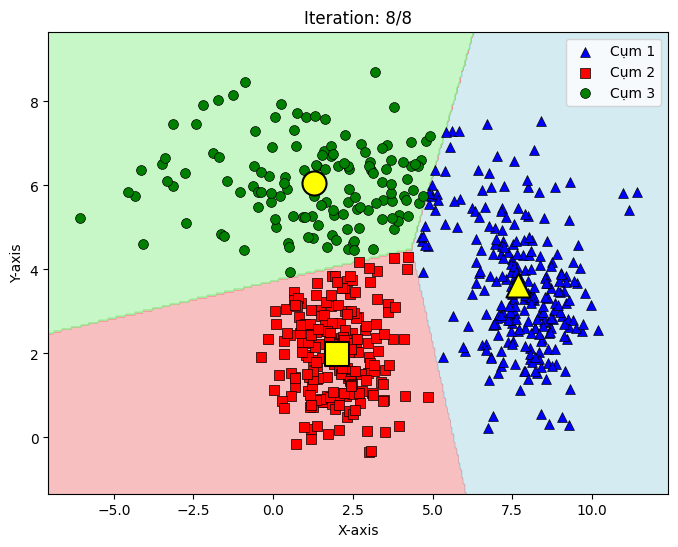

In [11]:
for i in [10]:
    np.random.seed(i)
    (centroids, labels, it) = kmeans(X3, K)
    it = len(labels) - 1  # Số vòng lặp (iterations)
    print(i)

    # Truyền giá trị cuối cùng của centroids và labels
    filename = 'skew_' + str(i) + '.pdf'
    
    # Hiển thị hình vẽ mà không lưu
    kmeans_display_progress(X3, centroids[-1], labels[-1], it, filename, saving=False)

**Nhận xét:**
- Cụm 3 trải dài hơn trên trên trục x (phân phối thẳng và rộng tương tự hình elip). 
- Cụm 2 phân phối khá tròn đều quanh tâm cụm.
- Cụm 1 phân phối quanh tâm cụm nhưng phân tán chứ không như cụm 2.

**Ảnh hưởng của $200$ điểm theo phân phối Gaussian $\mathcal{N}((3, 6), \Sigma_2)$ đến hiệu quả của k-means.**
- Do cụm này có phương sai quá lớn so với 2 cụm còn lại dẫn đến các điểm thuộc cụm sẽ bị phân nhầm sang 2 cụm còn lại. 
- Điều này diễn ra do k-means ưu tiên giảm sai số tổng thể và lựa chọn hy sinh độ chính xác ở các cụm có phương sai nhỏ hơn.
- Phân phối Gausian có phương sai lớn làm mất cân bằng các cụm, khiến phân cụm khó chính xác, tâm cụm lệch và biên không đúng, các điểm dễ bị gán sai.